In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from data_processing import load_and_clean_survey_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = load_and_clean_survey_data('../data/raw/GiG2025_clean.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 38 non-null     object
 1   last_name                  38 non-null     object
 2   email_id                   38 non-null     object
 3   academic_position          38 non-null     object
 4   faculty                    38 non-null     object
 5   department                 38 non-null     object
 6   discipline                 38 non-null     object
 7   health_research_keywords   38 non-null     object
 8   research_methods           38 non-null     object
 9   research_methods_other     38 non-null     object
 10  research_methods_keywords  38 non-null     object
 11  health_research_pubs       38 non-null     object
 12  research_methods_pubs      24 non-null     object
 13  third_party_funding_org    36 non-null     object
 14  collab_count

In [4]:
df['academic_position'].unique()

array(['Associate Professor/Ao. Professor', 'Full Professor',
       'Scientific Staff', 'Assistant Professor', 'Senior Scientist',
       'University Assistant (post doc)', 'Senior Lecturer'], dtype=object)

In [5]:
df['faculty'].unique()

array(['Faculty of Psychology', 'Faculty of Social sciences',
       'Centre for Sport Science and University Sports',
       'Faculty of Philological and Cultural Studies',
       'Faculty of Chemistry', 'Centre for Molecular Biology',
       'Faculty of Law', 'Centre for Teacher Education',
       'Faculty of Life sciences'], dtype=object)

In [6]:
df['department'].unique()

array(['Department of Clinical and Health Psychology',
       'Department of Developmental and Educational Psychology',
       'Department of Sociology',
       'Department of Sport and Human Movement Science',
       'Department of Political Science ', 'Department of Musicology',
       'Institute of Analytical Chemistry', 'Department of German ',
       'Department of Occupational, Economic, and Social Psychology',
       'Department of Biological Chemistry & CeMESS',
       'Department of Communication',
       'Ludwig Boltzmann Institute for Network Medicine',
       'Department of Constitutional and Administrative Law',
       'Department of Social and Cultural Anthropology',
       'Department of Cognition, Emotion, and Methods in Psychology',
       'Department of Education',
       'Outpatient Unit of Research, Teaching, and Practice',
       'Department of Demography', 'Department of Nutritional Sciences',
       'Institute for Sport and Movement Science',
       'Department o

In [7]:
df['discipline'].unique()

array(['social neuroscience', 'Health psychology', 'Psychology',
       'Clinical Child and Adolescent Psychology', 'Sociology',
       'Sport Science', 'Political science', 'Health Psychology',
       'Psychology / Stress research', 'Clinical Psychology',
       'Psychology of art, music, stress, health', 'music psychology',
       'Drug modes of action', 'Literary- and Cultural Studies ',
       'International Political Sociology',
       'Applied Social Psychology and Consumer Research',
       'Sport Psychology', 'Microbial Biochemistry', 'Communication',
       'Network Medicine',
       'Medical law (in particular public law aspects)',
       'Communication Science',
       'Science & Technology Studies, Medical Anthropology, Public Health',
       'Inclusive Education, German language support, Educational Unequity ',
       'Built environment ', 'Clinical Psychology and Psychotherapy',
       'Metabolomics', 'Demography & Economics',
       'Molecular Nutritional Science', 'Mole

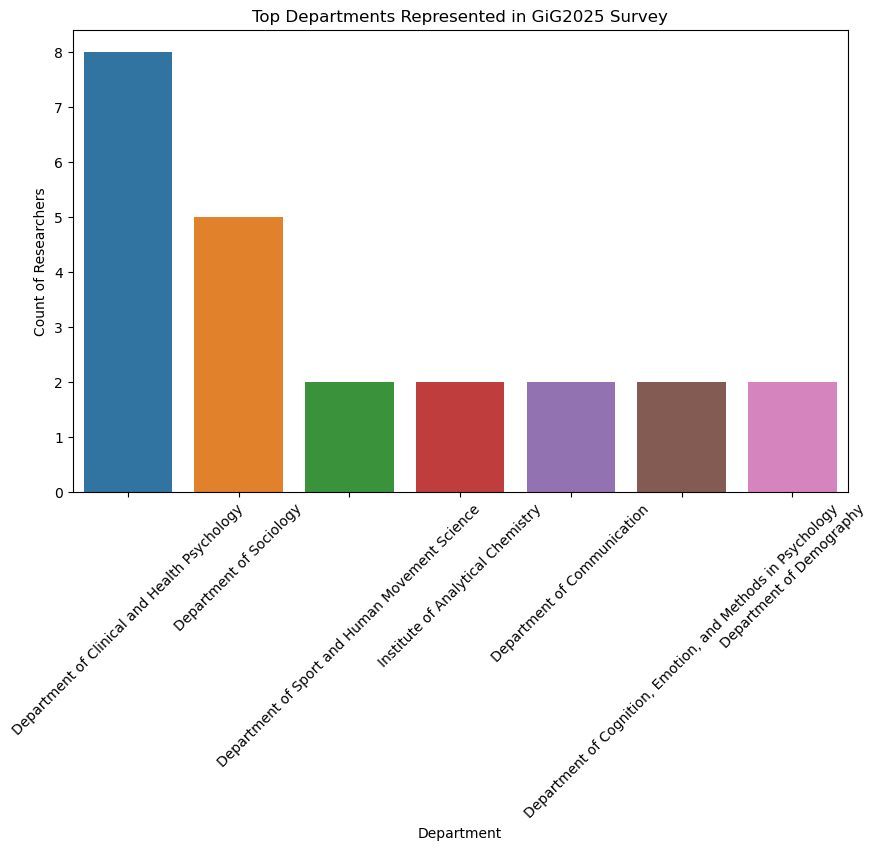

In [8]:
from collections import Counter

# Create a Counter for the 'department' column
department_counter = Counter(df['department'])

# Get the top most common departments
top_departments = department_counter.most_common(7)

# Extract department names and their counts
departments, counts = zip(*top_departments)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(departments), y=list(counts), hue=departments)
plt.xlabel('Department')
plt.ylabel('Count of Researchers')
plt.title('Top Departments Represented in GiG2025 Survey')
plt.xticks(rotation=45)
plt.show()

In [9]:
df['collab_fac1'].unique()

array(['Faculty of Computer science', 'Faculty of Social sciences',
       'Faculty of Life sciences', 'Centre for Teacher Education', None,
       'Faculty of Law', 'Centre for Sport Science and University Sports',
       'Faculty of Psychology',
       'Faculty of Philological and Cultural Studies',
       'Faculty of Catholic Theology'], dtype=object)

In [10]:
df.head()

,first_name,last_name,email_id,academic_position,faculty,department,discipline,health_research_keywords,research_methods,research_methods_other,...,health_third_mission,participate_in_kinderuni,participate_in_lndf,outreach_other,collab_fac1,collab_fac2,collab_uni1,collab_uni2,collab_uni3,collab_uni4
0,Giorgia,Silani,giorgia.silani@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Psychology,Department of Clinical and Health Psychology,social neuroscience,"[mental health literacy, emotions, empathy, ne...",mainly quantitative,-99,...,-99,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Computer science,Centre for Sport Science and University Sports,Graz Medical University,University of Salzburg,None,None
1,Laura,König,laura.koenig@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Health psychology,"[health promotion, diet, physical activity, se...",mainly quantitative,-99,...,"lay audiences/ general public, e.g. via podcas...",No,"Yes, please contact me about it",-99,Faculty of Social sciences,None,Vienna Medical University,University of Music and Performing Arts in Vienna,None,None
2,Julia,Holzer,julia.holzer@univie.ac.at,Scientific Staff,Faculty of Psychology,Department of Developmental and Educational Ps...,Psychology,"[well-being, motivation, basic psychological n...",both quantitative and qualitative,-99,...,I regularly give talks and workshops for vario...,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Life sciences,None,None,None,None,None
3,Martina,Zemp,martina.zemp@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Clinical Child and Adolescent Psychology,"[children, adolescents, families, couples, rel...",mainly quantitative,-99,...,-99,No,No,-99,Centre for Teacher Education,None,Vienna Medical University,None,None,None
4,Valeria,Bordone,valeria.bordone@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Social sciences,Department of Sociology,Sociology,"[Cognition, wellbeing, intergenerational relat...",mainly quantitative,-99,...,-99,"Yes, please contact me about it",No,-99,None,None,None,None,None,None


In [11]:
df['collab_uni1'].unique()

array(['Graz Medical University', 'Vienna Medical University', None,
       'Vienna University of Economics and Business Administration',
       'University of Graz', 'University of Innsbruck',
       'Other, not listed, organizations', 'University of Salzburg'],
      dtype=object)

In [12]:
# it's a combination of countries and international institutes (hence figure out later)
df['collab_countries'].unique()

array(['-99', 'USA, UK, the Netherlands, Belgium, Germany, Ukraine',
       'Icahn School of Medicine at Mount Sinai', 'Italy, UK, Germany',
       'Netherlands; Australia; UK; Norway; Germany; ', 'USA; UK',
       'University of Pennsylvania', 'Norway; Argentina', 'xx',
       'University of Sussex; Institute of International Relations Prague; Nottingham Trent University',
       'Germany, Switzerland',
       'Slovak Academy of Science; Yale School of Medicine',
       'Germany, USA', 'USA, Netherlands', 'US, Netherlands, Germany',
       'Germany, UK, US', 'UK', 'LMU Munich; KU Leuven, USI Switzerland',
       'Norway, Serbia, Italy',
       'UK, Turkey (PIs of two large, multi-national studies I contributed to and with whom I have ongoing collaborations)',
       'Universitat Pompeu Fabra, Spain', 'Germany; France',
       'ZEMKI Bremen, Germany',
       'Japan, Brazil, Sweden, France, Germany, China',
       'University of Padua, UCL',
       'Israel, Spain, Latvia, Germany, Italy

In [13]:
df['research_methods'].unique()

array(['mainly quantitative', 'both quantitative and qualitative',
       'mainly qualitative', 'other:'], dtype=object)

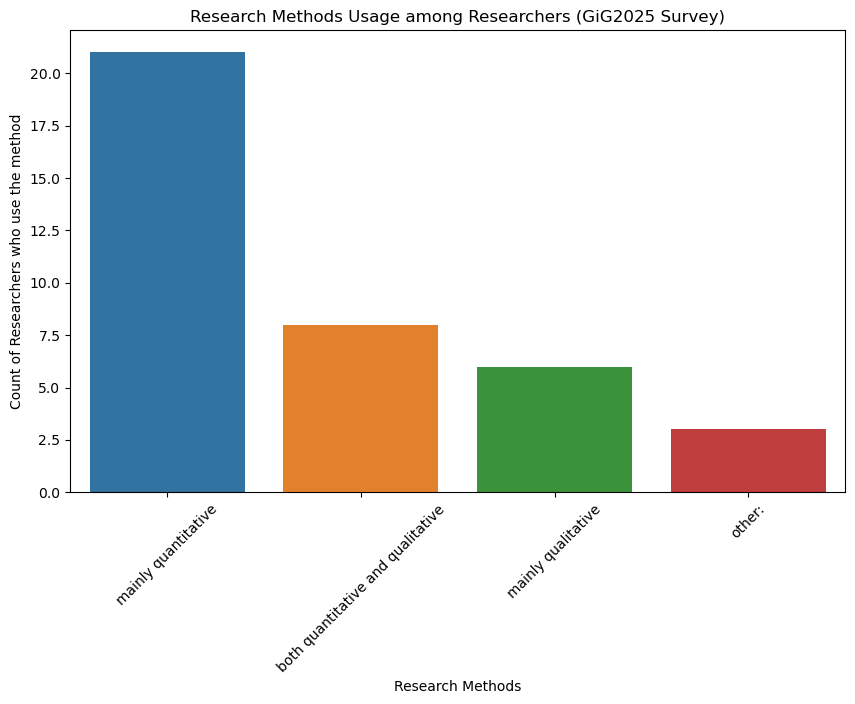

In [14]:
# Count the occurrences of each research method
research_methods_counts = df['research_methods'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=research_methods_counts.index, hue=research_methods_counts.index, y=research_methods_counts.values, legend=False)
plt.xlabel('Research Methods')
plt.ylabel('Count of Researchers who use the method')
plt.title('Research Methods Usage among Researchers (GiG2025 Survey)')
plt.xticks(rotation=45)
plt.show()

In [15]:
df['research_methods_other'].unique()

array(['-99', 'Legal dogmatics (Analysis of positive law)',
       'qualitative as a researcher; mixed methods in research teams',
       "Its quantitative but in our field it means that we work with absolute concentrations of compounds and not relative changes. I don't know if this is meant in this question."],
      dtype=object)

In [19]:
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html
from IPython.display import HTML

plot = figure()
plot.scatter([1,2], [3,4])

html = file_html(plot, CDN, "my plot")
display(HTML(html))

In [20]:
html = file_html(plot, CDN, "my plot")
print(html)

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>my plot</title>
    <style>
      html, body {
        box-sizing: border-box;
        display: flow-root;
        height: 100%;
        margin: 0;
        padding: 0;
      }
    </style>
    <script type="text/javascript" src="https://cdn.bokeh.org/bokeh/release/bokeh-3.6.3.min.js"></script>
    <script type="text/javascript">
        Bokeh.set_log_level("info");
    </script>
  </head>
  <body>
    <div id="d5061b87-e408-4bfd-bde2-8bac2d163874" data-root-id="p1001" style="display: contents;"></div>
  
    <script type="application/json" id="e57ef489-3e52-496e-a622-6314a33600a2">
      {"82a0572d-a90c-454a-a68f-3afa2b9b7e4e":{"version":"3.6.3","title":"Bokeh Application","roots":[{"type":"object","name":"Figure","id":"p1001","attributes":{"x_range":{"type":"object","name":"DataRange1d","id":"p1002"},"y_range":{"type":"object","name":"DataRange1d","id":"p1003"},"x_scale":{"type":"object","name":"LinearScal

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes with attributes
for _, row in df.iterrows():
    G.add_node(row['email_id'], name=f"{row['first_name']} {row['last_name']}", faculty=row['faculty'])

# Add edges based on faculty and collab_fac1
for _, row in df.iterrows():
    if pd.notna(row['collab_fac1']):
        for _, target_row in df.iterrows():
            if row['collab_fac1'] == target_row['faculty']:
                G.add_edge(row['email_id'], target_row['email_id'])


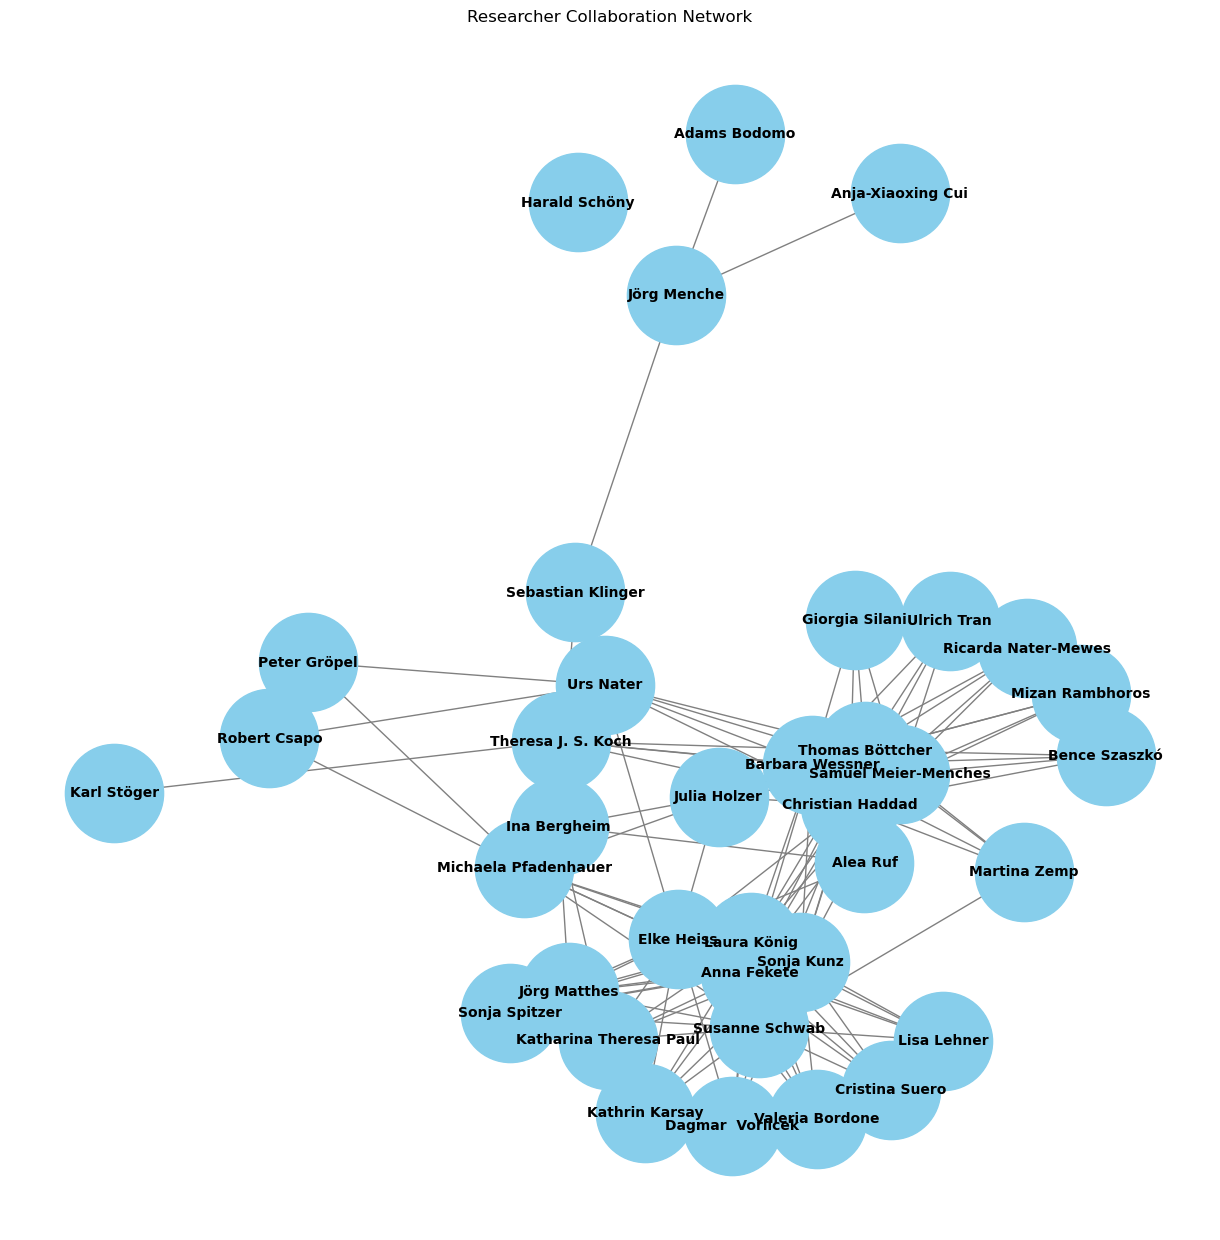

In [22]:
# visualisation of researcher collaboration network (each edge represents a collaboration between two researchers)
pos = nx.spring_layout(G, k=0.5)  # Adjust k value to increase spacing
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'name'), node_size=5000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray')
plt.title('Researcher Collaboration Network')
plt.show()

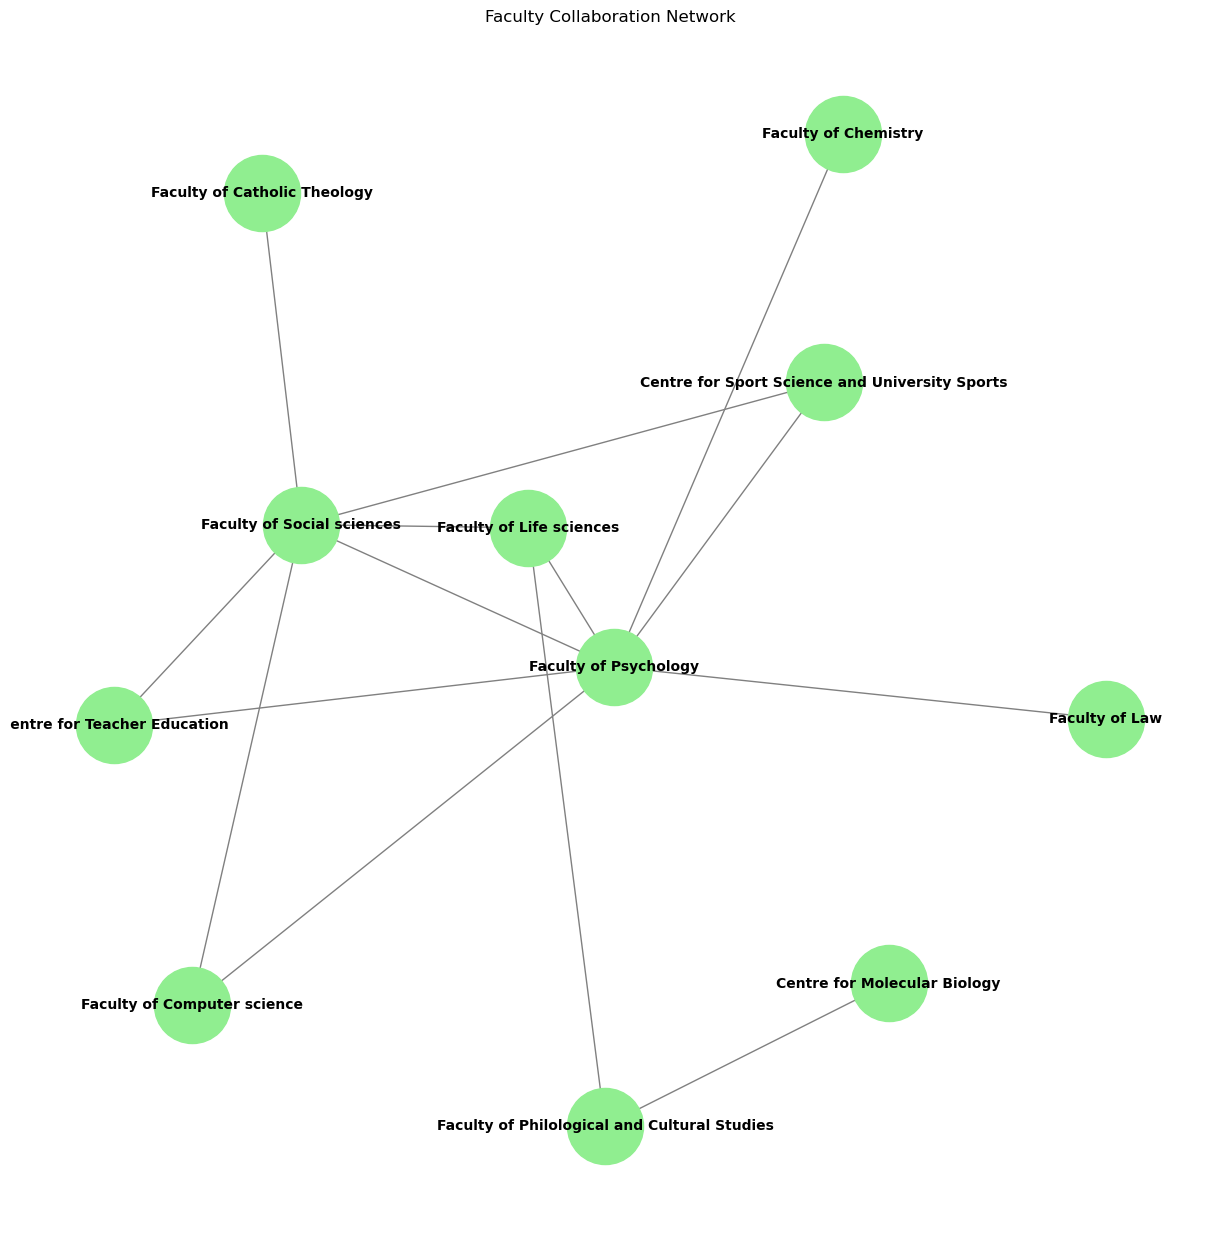

In [23]:
# Create a new graph for faculties
faculty_graph = nx.Graph()

# Add nodes for each unique faculty
faculties = df['faculty'].unique()
faculty_graph.add_nodes_from(faculties)

# Add edges based on collab_fac1
for _, row in df.iterrows():
    if pd.notna(row['collab_fac1']):
        faculty_graph.add_edge(row['faculty'], row['collab_fac1'])

# Visualize the faculty collaboration network
pos = nx.spring_layout(faculty_graph, k=1.5)  # Adjust k value to increase spacing
plt.figure(figsize=(12, 12))
nx.draw(faculty_graph, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_color='black', font_weight='bold', edge_color='gray')
plt.title('Faculty Collaboration Network')
plt.show()

In [24]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Circle, MultiLine, HoverTool
from bokeh.palettes import Spectral11

output_notebook()

Loading BokehJS ...

In [25]:
# Create a Bokeh plot
plot = figure(title="Faculty Collaboration Network", x_range=(-1.5, 1.5), y_range=(-1.5, 1.5),
                tools="", toolbar_location=None)

# Create a GraphRenderer
graph = GraphRenderer()

# Add nodes and edges
graph.node_renderer.data_source.add(list(faculty_graph.nodes), 'index')
graph.node_renderer.data_source.add(Spectral11, 'color')
graph.node_renderer.glyph = Circle(fill_color='color')

nodes_list = list(faculty_graph.nodes())
graph.edge_renderer.data_source.data = dict(
    start=[nodes_list.index(edge[0]) for edge in faculty_graph.edges()],
    end=[nodes_list.index(edge[1]) for edge in faculty_graph.edges()]
)
graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=1)

# Set the layout provider
graph.layout_provider = StaticLayoutProvider(graph_layout=pos)

# Add the graph to the plot
plot.renderers.append(graph)

# Add hover tool
hover = HoverTool(tooltips=[("Faculty", "@index")])
plot.add_tools(hover)

# Show the plot
show(plot)